In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import Analysis, AnalysisManager, GR_Confirmation, SpotDetection_Confirmation

c:\Users\formanj\GitHub\AngelFISH


Loads in the data from specified location

In [2]:
loc = None # r'C:\Users\formanj\Downloads\DUSP1_Dex_0min_20220224.h5' # r"Y:\smFISH_images\Eric_smFISH_images\20230511\GR_ICC_3hr_R1_1nM_0min_050823\GR_ICC_3hr_R1_1nM_0min_050823.h5"
log_location = r'\\munsky-nas.engr.colostate.edu\share\Users\Jack\All_Analysis'
am = AnalysisManager(location=loc, log_location=log_location) # change this to your mounted drive location for this folder
# This analysis is best done with the NAS mounted 

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_ER_Dec0324_2024-12-19
Analysis_ER_Dec0324_DUSP1_2024-12-19
Analysis_ER_Dec0324_GR_2024-12-20
Analysis_ER_Dec0324_2025-01-06
Analysis_ER_Dec0324_DUSP1_2025-01-07
Analysis_ER_Dec1924_wCyto_2024-12-19


['Analysis_ER_Dec0324_2024-12-19',
 'Analysis_ER_Dec0324_DUSP1_2024-12-19',
 'Analysis_ER_Dec0324_GR_2024-12-20',
 'Analysis_ER_Dec0324_2025-01-06',
 'Analysis_ER_Dec0324_DUSP1_2025-01-07',
 'Analysis_ER_Dec1924_wCyto_2024-12-19']

In [4]:
# can filter on name and dates
am.select_analysis('ER_Dec0324_DUSP1', ['2025-01-06', '2026-01-01'])
print(am.analysis)

[<HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>, <HDF5 group "/Analysis_ER_Dec0324_DUSP1_2025-01-07" (15 members)>]


In [5]:
am.list_datasets()

/Analysis_ER_Dec0324_DUSP1_2025-01-07 ['bigfish_25_quartile', 'bigfish_75_quartile', 'bigfish_90_quartile', 'bigfish_max_threshold', 'bigfish_mean_threshold', 'bigfish_median_threshold', 'bigfish_min_threshold', 'bigfish_std_threshold', 'cell_properties', 'cellresults', 'clusterresults', 'individual_spotdetection_thresholds', 'parameters', 'position_indexs', 'spotresults']
/Analysis_ER_Dec0324_DUSP1_2025-01-07 ['bigfish_25_quartile', 'bigfish_75_quartile', 'bigfish_90_quartile', 'bigfish_max_threshold', 'bigfish_mean_threshold', 'bigfish_median_threshold', 'bigfish_min_threshold', 'bigfish_std_threshold', 'cell_properties', 'cellresults', 'clusterresults', 'individual_spotdetection_thresholds', 'parameters', 'position_indexs', 'spotresults']
/Analysis_ER_Dec0324_DUSP1_2025-01-07 ['bigfish_25_quartile', 'bigfish_75_quartile', 'bigfish_90_quartile', 'bigfish_max_threshold', 'bigfish_mean_threshold', 'bigfish_median_threshold', 'bigfish_min_threshold', 'bigfish_std_threshold', 'cell_prope

Does analysis/confirmation

In [6]:
# select DUSP1 spot detection
SD = SpotDetection_Confirmation(am)

In [7]:
# this loads the data into memory 
SD.get_data()

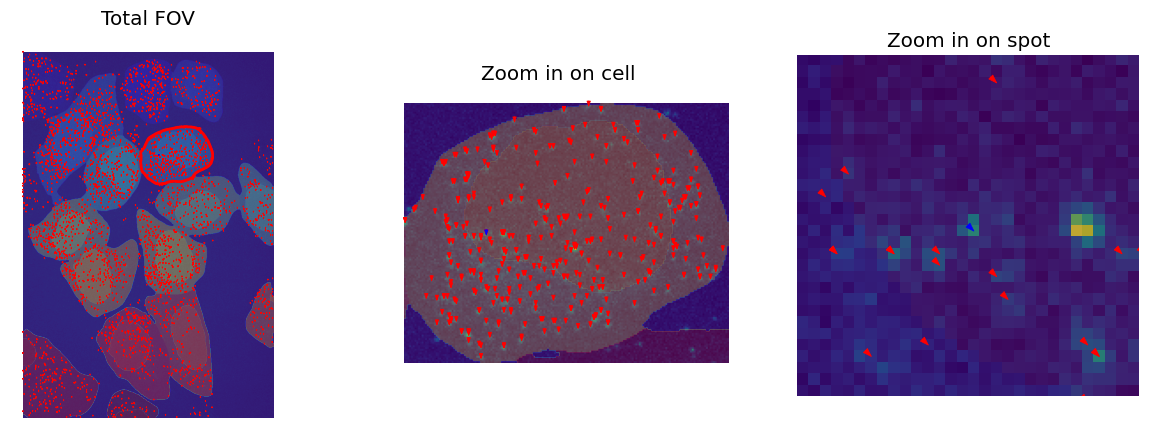

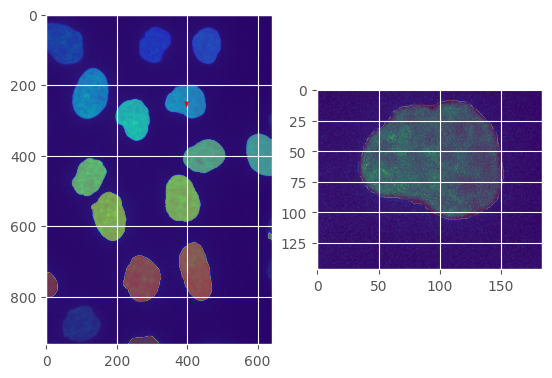

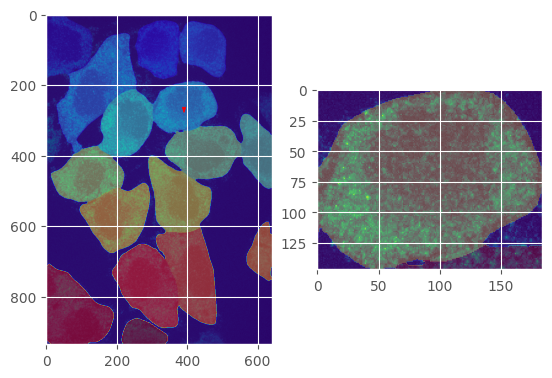

In [8]:
# run this multiple times to see a new randomly selected cell
SD.display(newFOV=False, newCell=True)

In [9]:
SD.spots

,z_px,y_px,x_px,cluster_index,is_nuc,cell_label,snr,signal,timepoint,fov,FISH_Channel,condition,replica,time,Dex_Conc,NAS_location,h5_idx
8,4.0,308.0,464.0,-1.0,0.0,6.0,5.093519,1834.0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
7,4.0,293.0,433.0,-1.0,0.0,6.0,4.459563,1772.0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
6,4.0,291.0,244.0,-1.0,0.0,5.0,1.773364,1337.0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
94,5.0,380.0,392.0,-1.0,0.0,6.0,3.647969,1880.0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
93,5.0,378.0,458.0,-1.0,0.0,6.0,2.310558,1386.0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,19.0,906.0,294.0,-1.0,0.0,14.0,7.552028,2153.0,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
2441,26.0,767.0,259.0,-1.0,0.0,12.0,8.623633,2408.0,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
2442,24.0,767.0,259.0,-1.0,0.0,12.0,7.428514,2192.0,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
2411,12.0,171.0,126.0,-1.0,0.0,3.0,5.941318,2411.0,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11


In [10]:
SD.clusters

,z_px,y_px,x_px,nb_spots,cluster_index,timepoint,fov,FISH_Channel,condition,replica,time,Dex_Conc,NAS_location,h5_idx
0,5,266,135,6,0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
1,6,404,295,6,1,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
2,12,223,428,36,2,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
3,11,913,76,14,3,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
4,14,862,156,36,4,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,4,195,201,4,1,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
2,5,197,200,4,2,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
3,5,181,39,4,3,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
5,9,167,96,4,5,0,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11


In [11]:
SD.cellprops


,nuc_label,nuc_bbox-0,nuc_bbox-1,nuc_bbox-2,nuc_bbox-3,nuc_area,nuc_centroid-0,nuc_centroid-1,nuc_intensity_max-0,nuc_intensity_max-1,...,cyto_intensity_std-1,cyto_intensity_std-2,fov,timepoint,condition,replica,time,Dex_Conc,NAS_location,h5_idx
0,1,0,363,64,490,5959.0,25.538010,431.931868,1988.0,2389.0,...,347.318024,76.616798,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
1,2,45,221,162,326,9143.0,103.318167,272.770863,3972.0,3690.0,...,391.138855,80.318779,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
2,3,132,429,239,536,8380.0,184.680191,483.856205,3103.0,2978.0,...,379.408905,80.263237,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
3,4,185,120,315,201,8316.0,251.416546,157.509981,5994.0,4558.0,...,623.781921,130.224030,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
4,5,222,195,345,290,8859.0,282.068518,240.457839,4538.0,4816.0,...,638.766785,135.640244,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,147,329,270,443,10210.0,212.896964,380.764643,5254.0,3926.0,...,439.245667,94.677116,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
2,3,141,59,219,193,8529.0,179.009145,126.005393,5922.0,3526.0,...,385.999237,83.782867,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
12,13,744,56,839,194,8444.0,792.056253,128.686168,3975.0,3816.0,...,492.010193,86.650581,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
13,14,859,252,936,372,7140.0,900.000280,309.909944,3498.0,2859.0,...,405.269562,100.064743,29,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11


In [12]:
SD.cellspots

,cell_id,cell_area,nuc_area,nb_rna,nb_rna_in_nuc,nb_rna_out_nuc,nb_foci,nb_transcription_site,fov,timepoint,FISH_Channel,condition,replica,time,Dex_Conc,NAS_location,h5_idx
0,2,27471,9143,140,30,110,0,0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
7,10,29631,9842,181,56,125,0,0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
5,7,16981,9142,134,61,73,0,1,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
6,9,31944,10092,154,36,118,0,0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
4,6,22019,7481,204,44,160,0,0,0,0,0,DUSP1_timesweep,D,0,0,smFISH_images/Eric_smFISH_images/20220225/DUSP...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,11,21356,8812,66,35,31,0,0,29,0,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
6,9,32273,9474,258,80,178,0,0,29,0,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
5,8,25373,8866,161,44,117,0,0,29,0,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11
4,7,32412,9267,276,95,181,0,0,29,0,0,DUSP1_timesweep,D,90,100,smFISH_images/Eric_smFISH_images/20220305/DUSP...,11


In [13]:
# find cells that have props but arent in the cell spots
allcells = SD.cellprops
cells_wSpots = SD.cellspots
# Find cells that are in allcells but not in cells_wSpots
merged = allcells.merge(cells_wSpots, how='left', left_on=['nuc_label', 'fov', 'NAS_location'], right_on=['cell_id', 'fov', 'NAS_location'], indicator=True)
print(merged.shape)
same_entries = merged[merged['_merge'] == 'both'].drop(columns=['cell_id', '_merge'])
different_entries = merged[merged['_merge'] == 'left_only'].drop(columns=['cell_id', '_merge'])

print("Same entries:")
print(same_entries.shape)
print("\nDifferent entries:")
print(different_entries.shape)

(5439, 85)
Same entries:
(3649, 83)

Different entries:
(1790, 83)


There are 5439 cells in this data set
There are 3649 cells with spots
956 cells are touching the border and are not counted


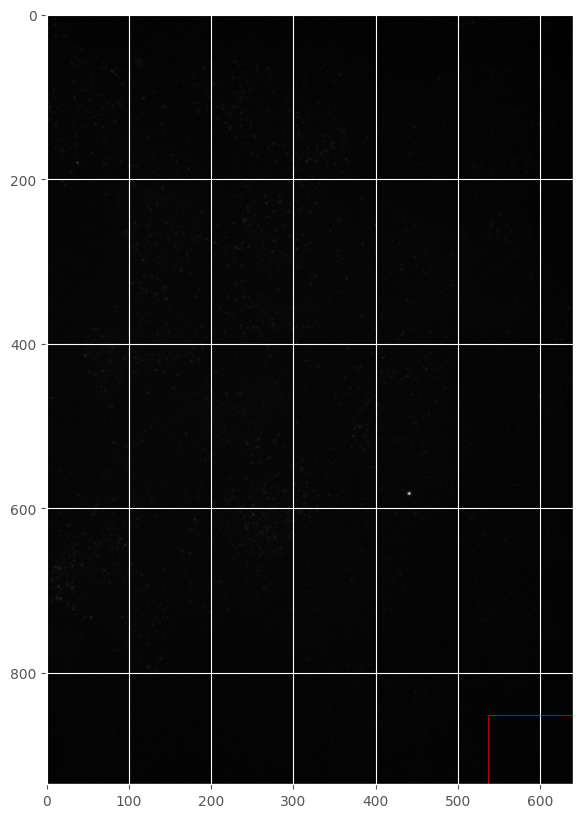

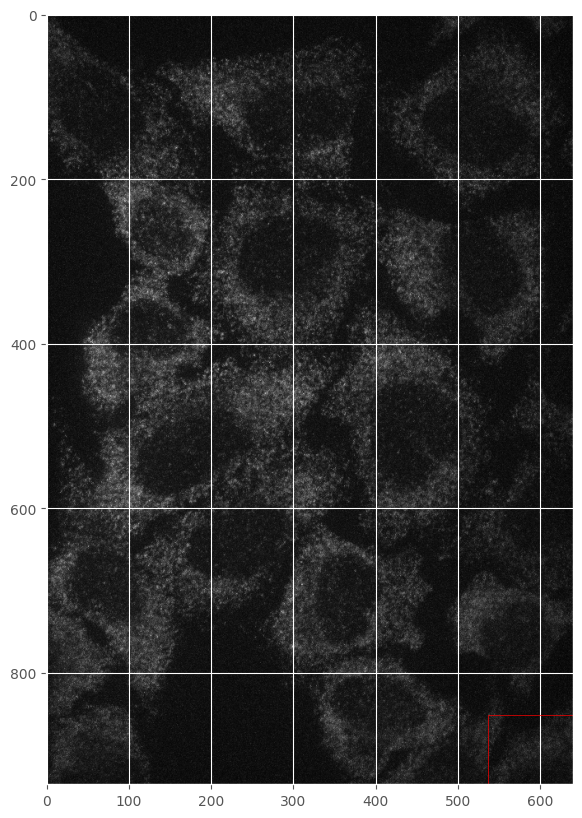

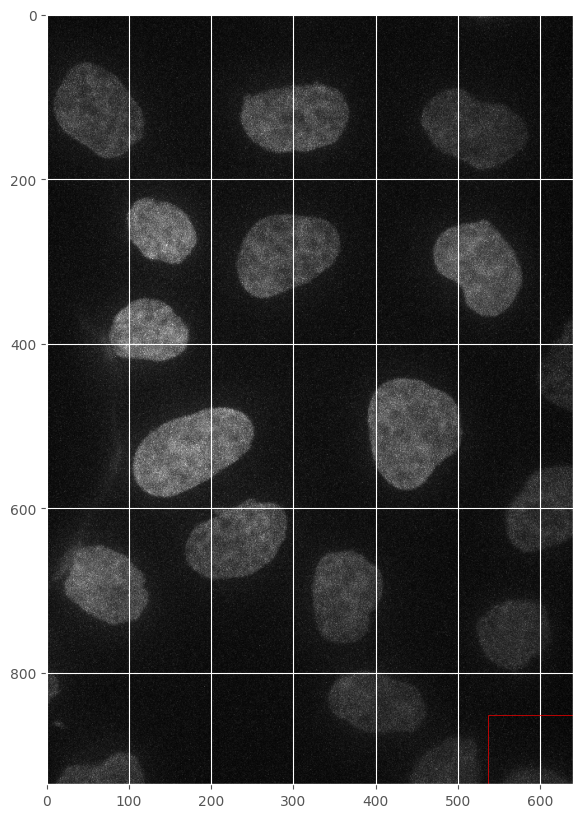

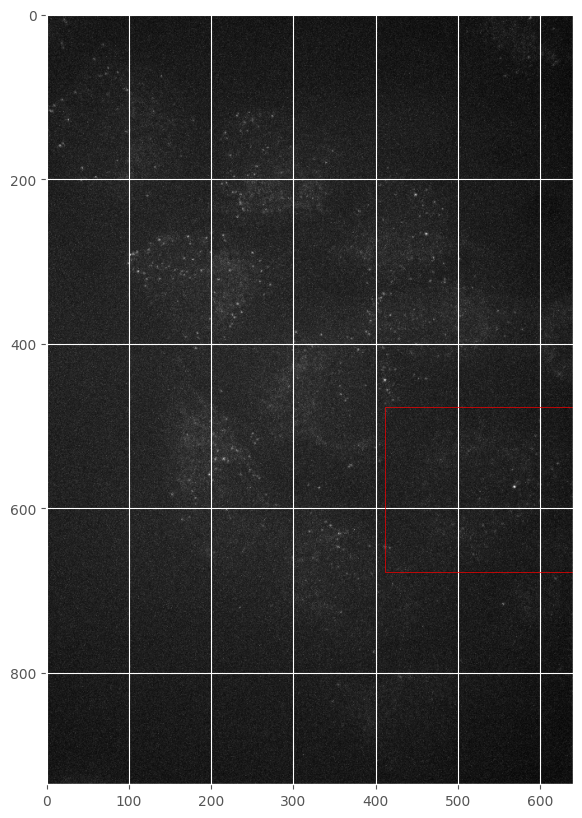

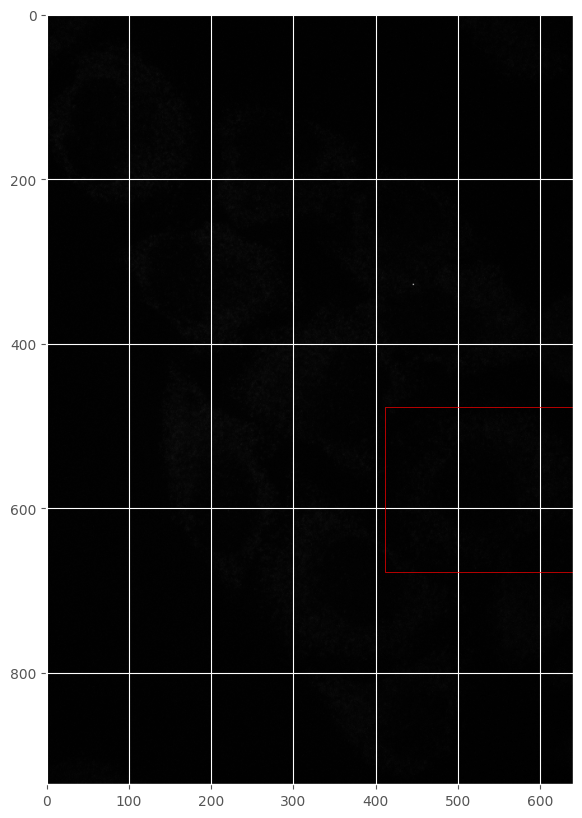

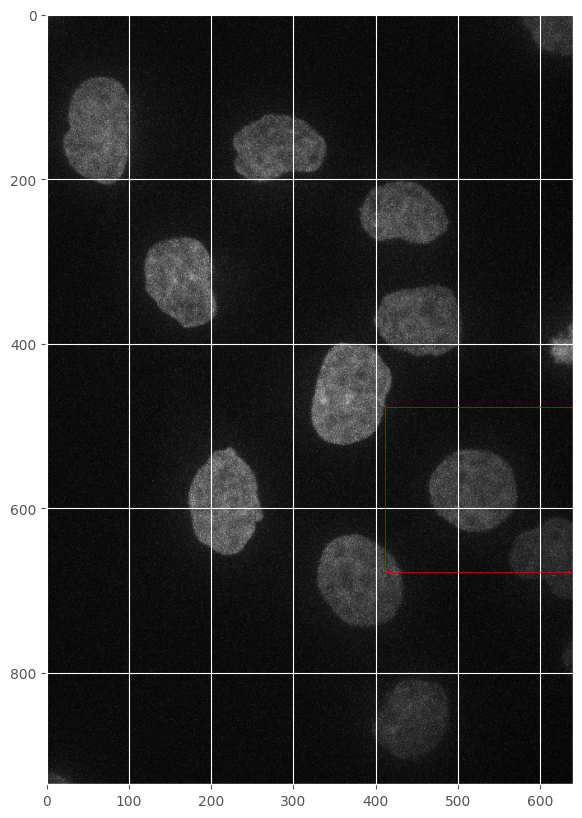

In [14]:
import random
import dask.array as da
print(f'There are {allcells.shape[0]} cells in this data set')
print(f'There are {cells_wSpots.shape[0]} cells with spots')

# how many are have bounded boxes touching the border
print(f'{different_entries['touching_border'].sum()} cells are touching the border and are not counted')

# Select a random row from the different_entries dataframe
for _ in range(2):
    random_row = different_entries[~different_entries['touching_border']].sample(n=1).iloc[0]

    # Read the h5 file
    h5_file = random_row['NAS_location']
    h5_file = os.path.join(r'\\munsky-nas.engr.colostate.edu\share', h5_file)
    with h5py.File(h5_file, 'r') as f:
        # Grab the mask and raw_image
        masks = da.from_array(f['/masks'])
        raw_images = da.from_array(f['/raw_images'])

        # Extract the bounding box coordinates
        bbox = [random_row['cell_bbox-0'], random_row['cell_bbox-1'], random_row['cell_bbox-2'], random_row['cell_bbox-3']]

        img = raw_images[random_row['fov'], random_row['timepoint_x']].squeeze()
        for c in range(img.shape[0]):
            # Display the raw image with the selected cell highlighted
            t = np.max(img[c, :, :,:], axis=0)
            t.compute()
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            ax.imshow(t, cmap='gray')
            rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.show()

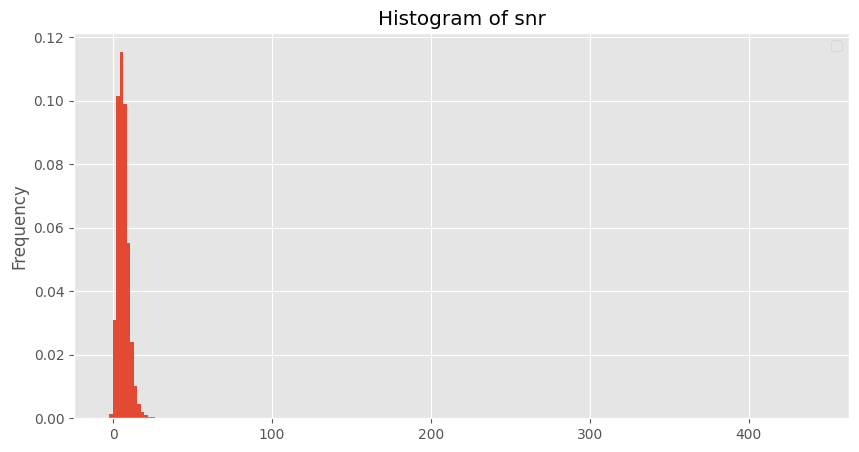

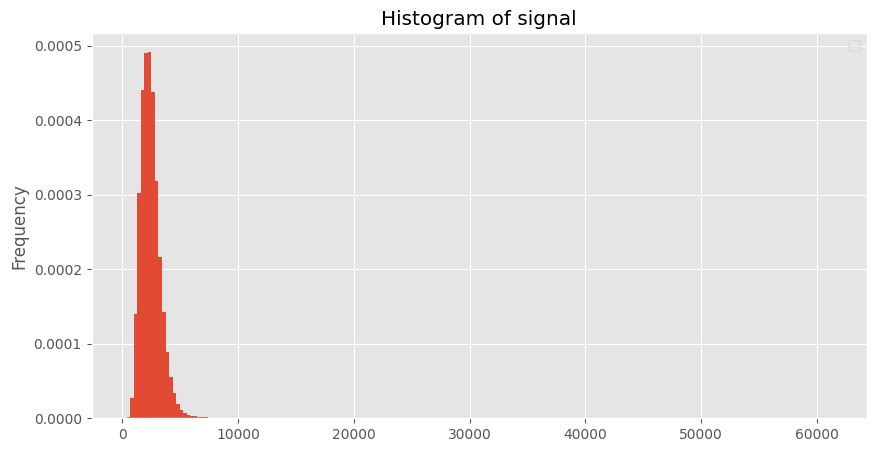

In [15]:
# Histogram of spots
keys_to_plot = ['signal', 'snr']
for k in SD.spots.keys():
    if k in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(SD.spots[k], bins=200, density=True)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

In [16]:
SD.cellspots.keys()

Index(['cell_id', 'cell_area', 'nuc_area', 'nb_rna', 'nb_rna_in_nuc',
       'nb_rna_out_nuc', 'nb_foci', 'nb_transcription_site', 'fov',
       'timepoint', 'FISH_Channel', 'condition', 'replica', 'time', 'Dex_Conc',
       'NAS_location', 'h5_idx'],
      dtype='object')

In [14]:
# spot counts as a function of time and dex
tp_set = sorted(set(SD.cellspots['time']))
dex_set = sorted(set(SD.cellspots['Dex_Conc']))
keys_to_plot = ['nb_rna', 'nb_rna_in_nuc']
for k in keys_to_plot:
    fig, axs = plt.subplots(len(tp_set), len(dex_set))
    for i_d, d in enumerate(dex_set):
        data = SD.cellspots[SD.cellspots['Dex_Conc'] == d]
        for i_t, t in enumerate(tp_set):
            axs[i_t, i_d].hist(data[k], bins=200, density=True)


    plt.show()



In [15]:
SD.close()

In [19]:
am.close()